# MRI Math Concepts

## Complex Numbers

$$c = a + i b = A\exp(i \phi)$$
$$ i = \sqrt{-1}, \,
\exp(i \phi) = \cos \phi + i \sin\phi$$
$$ |c| = A = \sqrt{a^2+b^2}$$
$$ \phi = \tan^{-1} (b/a)$$


## Impulse Function

The impulse (or delta) funcion, $\delta(x)$, can be used to represent sampling of a continuous signal, and has the following properties:

- $\delta(x) = 0$ for all $x \ne 0$
- $\delta(x) \rightarrow \infty$ at $x =0$
- $\int_{-\infty}^\infty \delta(x) dx = 1$
- $\delta(ax) = \frac{1}{|a|} \delta(x)$
- $f(x) \delta(x) = f(0) \delta(x)$
- $f(x) \ast \delta(x) = f(x)$


## Other Functions

Rectangle function
$$\mathrm{rect}(x) = \sqcap(x) = 
\left\{ 
  \begin{array}{l l}
    1 & \quad |x| < 1/2 \\
    1/2 & \quad |x| = 1/2 \\
    0 & \quad |x| > 1/2 \\
  \end{array} \right. $$



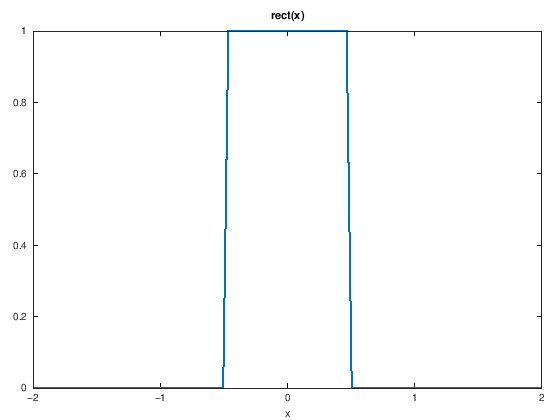

In [7]:
x = linspace(-2,2);
rect = ones(size(x));
rect(abs(x) > 0.5) = 0;
rect(abs(x) == 0.5) = 0.5;

plot(x,rect, 'LineWidth',4)
xlabel('x')
title('rect(x)')

Sinc (normalized)
$$\mathrm{sinc}(x) = \frac{\sin(\pi x)}{\pi x}$$


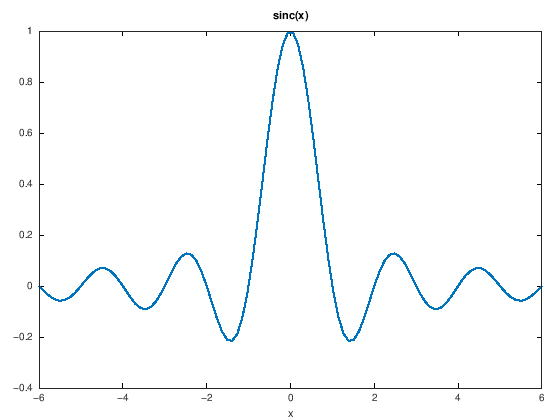

In [9]:
x = linspace(-6,6);

plot(x,sinc(x), 'LineWidth',4)
xlabel('x')
title('sinc(x)')

Comb/Shah (Impulse Train)

$$\mathrm{Comb}(x) = \sum_{n = -\infty}^\infty \delta(x - n)$$

## Convolution
The convolution operation $\ast$, is defined as:
$$ g(x) \ast h(x) = \int_{-\infty}^\infty g(x-\tau) h(\tau) d\tau$$


## Fourier Transforms

The Fourier transform, $ \mathcal{F} \{ \cdot \}$ of a complex-valued function, $f(x)$ is:

$$ \mathcal{F} \{ f(x) \} = F(k_x) = \int_{-\infty}^\infty f(x) \exp(-i 2 \pi k_x x) dx$$

(Unitary, ordinary frequency)

### Inverse Fourier Transform:
$$ \mathcal{F}^{-1} \{ F(k_x) \} = f(x) = \int_{-\infty}^\infty F(k_x) \exp(+i 2 \pi x k_x) dk_x$$

### 2-D Fourier Transform
$$ F(k_x,k_y) = \int_{-\infty}^\infty \int_{-\infty}^\infty f(x,y) \exp(-i 2 \pi (k_x x + k_y y) ) dx dy$$

### N-D Fourier Transform
$$ F(\vec{k}) = \int_{-\infty}^\infty f(\vec{x}) \exp(-i 2 \pi \vec{k}\cdot \vec{x}) d\vec{x}$$

### Duality
$$\mathcal{F}\{f(x)\} = F(k_x)$$
$$\mathcal{F}\{F(x)\} = f(-k_x)$$
$$\mathcal{F}\{F(-x)\} = f(k_x)$$

### Separable

If $f(x,y) = f_x(x) f_y(y)$, then $\mathcal{F}\{f(x,y)\} = \mathcal{F}\{f_x(x)\} \mathcal{F}\{f_y(y)\}$




## Fourier Transform Identities and Pairs
For 
$\mathcal{F}\{f(x)\} = F(k_x), \mathcal{F}\{g(x)\} = G(k_x)$:

| &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp;  Function  &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp;    |  &nbsp; &nbsp;&nbsp;&nbsp;   Fourier    Transform   &nbsp; &nbsp; &nbsp; &nbsp; |
| :--- | --- | 
| $\delta(x)$ | 1 |  
| 1 | $\delta(k_x)$ | 
| $\mathrm{rect}(x)$ | $\mathrm{sinc}(k_x)$  | 
| $f(ax)$ | $\frac{1}{|a|} F(\frac{k_x}{a})$ | 
| $a \cdot f(x) + b \cdot g(x)$ | $a \cdot F(k_x) + b \cdot G(k_x)$  | 
| $f(x-a)$ | $\exp(-i 2\pi a k_x) F(k_x)$ | 
| $\exp(i 2\pi a x) f(x)$ | $F(k_x - a)$ | 
| $f(x) \ast g(x)$ | $F(k_x) G(k_x)$  | 
| $f(x) g(x)$ | $F(k_x) \ast G(k_x)$  | 


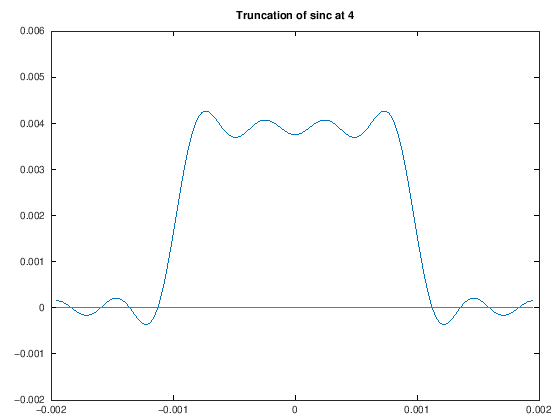

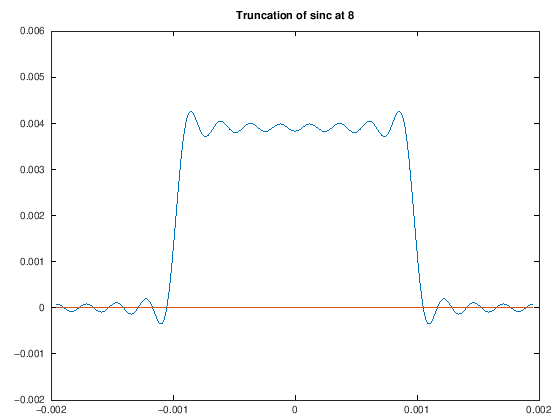

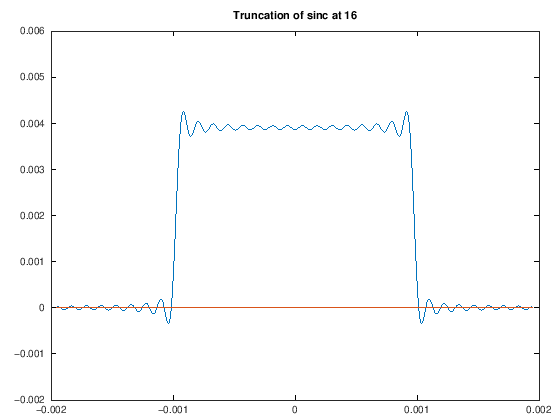

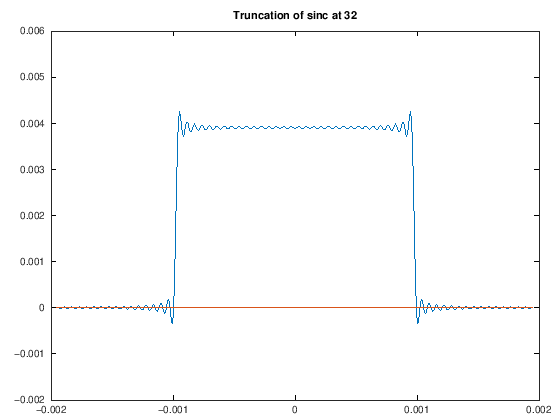

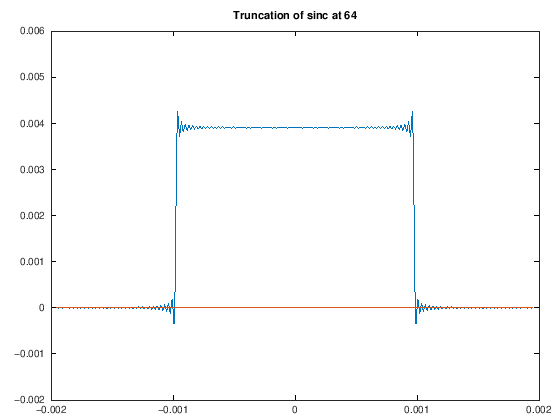

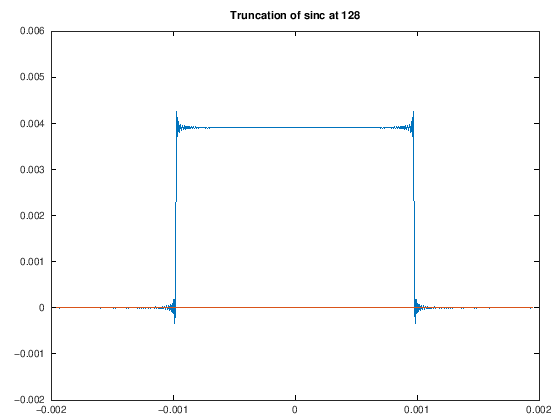

In [1]:
% Illustrate Fourier decomposition of a rect function (could illustrate ringing)

N = 512;
kxmax = 128;
kx = [-N/2:N/2-1]/N * kxmax*2;

x = [-N/2:N/2-1]/N /(2*kxmax);

for kxmax_truncate = [4 8 16 32 64 128];

F = sinc(kx);
F(find(abs(kx)>kxmax_truncate)) = 0;

f = fftshift(ifft(ifftshift(F)));
figure
plot(x,real(f), x, imag(f))
title(['Truncation of sinc at ' num2str(kxmax_truncate)])
end